In [3]:
import pandas as pd

Had some issues with the format and how it showed. Learned that if I use print, it displays a plain text version that is ugly to look at.

In [4]:
url = "https://drive.google.com/uc?id=1AWPf-pJodJKeHsARQK_RHiNsE8fjPCVK&export=download"
df = pd.read_csv(url)
df.head(5)

,Index,User Id,First Name,Last Name,Sex,Email,Phone,Date of birth,Job Title
0,1,8717bbf45cCDbEe,Shelia,Mahoney,Male,pwarner@example.org,857.139.8239,2014-01-27,Probation officer
1,2,3d5AD30A4cD38ed,Jo,Rivers,Female,fergusonkatherine@example.net,+1-950-759-8687,1931-07-26,Dancer
2,3,810Ce0F276Badec,Sheryl,Lowery,Female,fhoward@example.org,(599)782-0605,2013-11-25,Copy
3,4,BF2a889C00f0cE1,Whitney,Hooper,Male,zjohnston@example.com,+1-939-130-6258,2012-11-17,Counselling psychologist
4,5,9afFEafAe1CBBB9,Lindsey,Rice,Female,elin@example.net,(390)417-1635x3010,1923-04-15,Biomedical engineer


In [5]:
df.insert(9, "Email Domain", True )
df["Email Domain"] = df['Email'].str.split('@').str[1]
df.head(5)

,Index,User Id,First Name,Last Name,Sex,Email,Phone,Date of birth,Job Title,Email Domain
0,1,8717bbf45cCDbEe,Shelia,Mahoney,Male,pwarner@example.org,857.139.8239,2014-01-27,Probation officer,example.org
1,2,3d5AD30A4cD38ed,Jo,Rivers,Female,fergusonkatherine@example.net,+1-950-759-8687,1931-07-26,Dancer,example.net
2,3,810Ce0F276Badec,Sheryl,Lowery,Female,fhoward@example.org,(599)782-0605,2013-11-25,Copy,example.org
3,4,BF2a889C00f0cE1,Whitney,Hooper,Male,zjohnston@example.com,+1-939-130-6258,2012-11-17,Counselling psychologist,example.com
4,5,9afFEafAe1CBBB9,Lindsey,Rice,Female,elin@example.net,(390)417-1635x3010,1923-04-15,Biomedical engineer,example.net


array([<Axes: ylabel='count'>], dtype=object)

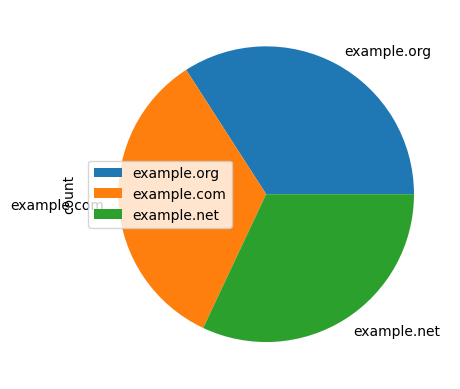

In [16]:
domain_counts = df["Email Domain"].value_counts()

domain_df = pd.DataFrame(domain_counts)

domain_df.plot(kind='pie', subplots=True)


https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.pie.html
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html